In [1]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("customers.csv")

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#df.drop(["Channel", "Region"], axis = 1, inplace = True)
df = df[["Grocery","Frozen",'Detergents_Paper']]

In [5]:
np_array = df.values.astype("float32", copy = False)
np_array[0:10]

array([[ 7561.,   214.,  2674.],
       [ 9568.,  1762.,  3293.],
       [ 7684.,  2405.,  3516.],
       [ 4221.,  6404.,   507.],
       [ 7198.,  3915.,  1777.],
       [ 5126.,   666.,  1795.],
       [ 6975.,   480.,  3140.],
       [ 9426.,  1669.,  3321.],
       [ 6192.,   425.,  1716.],
       [18881.,  1159.,  7425.]], dtype=float32)

In [6]:
scaler = MinMaxScaler().fit(np_array)
np_array = scaler.transform(np_array)
np_array[0:10]

array([[0.08146416, 0.0031063 , 0.0654272 ],
       [0.10309667, 0.02854842, 0.08058985],
       [0.08278991, 0.03911643, 0.08605233],
       [0.04546386, 0.1048419 , 0.01234568],
       [0.07755155, 0.063934  , 0.04345483],
       [0.05521843, 0.01053514, 0.04389575],
       [0.07514793, 0.00747814, 0.07684205],
       [0.10156612, 0.02701992, 0.08127572],
       [0.06670834, 0.00657419, 0.04196061],
       [0.20347716, 0.01863783, 0.18180482]], dtype=float32)

In [7]:
dbsc = DBSCAN(eps = .10, min_samples = 20).fit(np_array)

In [8]:
# Now, let's add the scaled value columns back onto the dataframe
columns = list(df.columns)
scaled_columns = ["Scaled_" + column for column in columns]

# Save a copy of the original dataframe
original_df = df.copy()

# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(np_array, columns=scaled_columns)

# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [9]:
labels = dbsc.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
df['labels'] = labels
df.labels.value_counts()

 0    422
-1     18
Name: labels, dtype: int64

In [11]:
df[df.labels==-1].head()

,Grocery,Frozen,Detergents_Paper,Scaled_Grocery,Scaled_Frozen,Scaled_Detergents_Paper,labels
47,55571,7782,24171,0.598942,0.127490,0.592005,-1
56,26866,2616,17740,0.289544,0.042584,0.434475,-1
61,59598,3254,26701,0.642347,0.053070,0.653978,-1
65,45828,36,24231,0.493926,0.000181,0.593474,-1
85,92780,1026,40827,1.000000,0.016452,1.000000,-1


In [12]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(df.describe())
print("-------------")
print("Inliers")
print(df[df.labels==0].describe())
print("-------------")
print("Outliers")
print(df[df.labels==-1].describe())

Population
            Grocery        Frozen  Detergents_Paper  Scaled_Grocery  \
count    440.000000    440.000000        440.000000      440.000000   
mean    7951.277273   3071.931818       2881.493182        0.085671   
std     9503.162829   4854.673333       4767.854448        0.102430   
min        3.000000     25.000000          3.000000        0.000000   
25%     2153.000000    742.250000        256.750000        0.023174   
50%     4755.500000   1526.000000        816.500000        0.051225   
75%    10655.750000   3554.250000       3922.000000        0.114821   
max    92780.000000  60869.000000      40827.000000        1.000000   

       Scaled_Frozen  Scaled_Detergents_Paper      labels  
count     440.000000               440.000000  440.000000  
mean        0.050078                 0.070510   -0.040909  
std         0.079789                 0.116790    0.198305  
min         0.000000                 0.000000   -1.000000  
25%         0.011788                 0.006216    

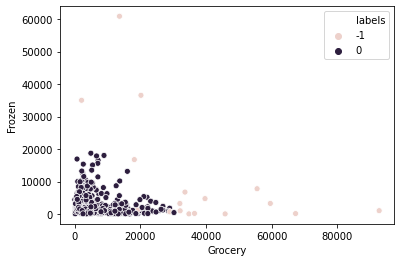

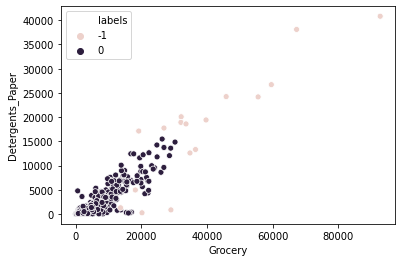

In [15]:
sns.scatterplot(df.Grocery, df.Frozen, hue=df.labels)
plt.show()

sns.scatterplot(df.Grocery, df.Detergents_Paper, hue=df.labels)
plt.show()

Text(0.5, 0, 'Grocery')

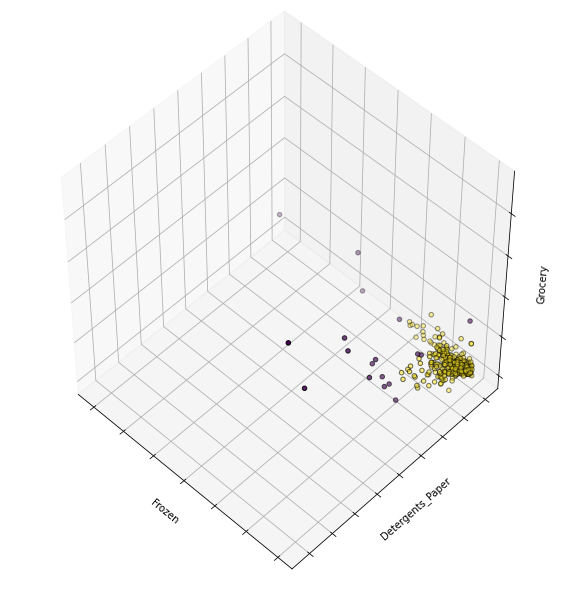

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Frozen, df.Detergents_Paper, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Detergents_Paper')
ax.set_zlabel('Grocery')

In [17]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_table("curriculum-access.txt", sep = '\s', header = None, 
                   names = ['date', 'time', 'page', 'id', 'cohort', 'ip'])

df.head()

,date,time,page,id,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [18]:
df.shape

(543596, 6)

In [19]:
id_counts = df.groupby(['id'])['date','cohort','page'].nunique()
cohort_counts = df.groupby(['cohort'])['page','id','date'].nunique()
first_access = df.groupby(['id'])['date'].min()
id_by_first_access_date = pd.DataFrame({'first_access_date': first_access}).reset_index().groupby('first_access_date').count()

In [20]:
id_by_first_access_date

,id
first_access_date,
2018-01-26,50
2018-01-27,2
2018-01-28,2
2018-01-29,12
2018-01-30,7
...,...
2020-03-25,8
2020-04-09,2
2020-04-22,1


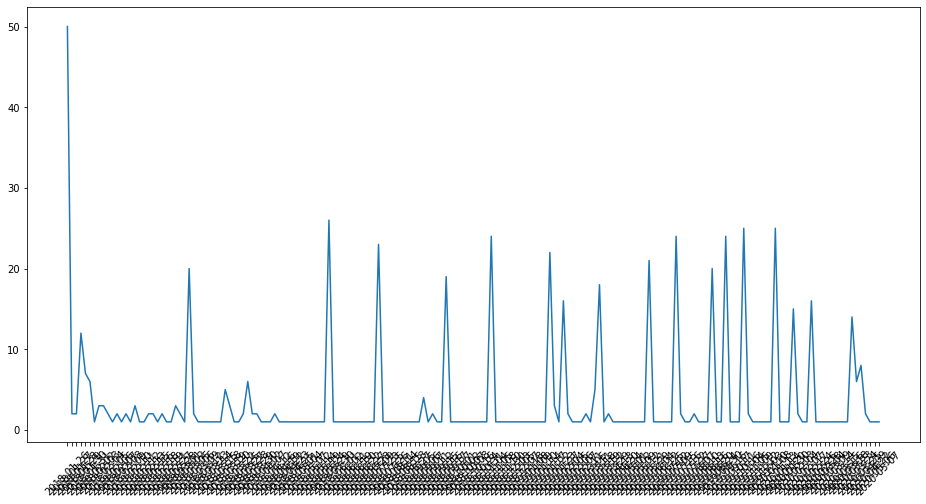

In [21]:
fig = plt.figure(figsize=(16, 8))
plt.plot(id_by_first_access_date)
plt.xticks(rotation = 45)
plt.show()

In [22]:
id_counts[id_counts.cohort > 1]

,date,cohort,page
id,,,
1,451,2,819
11,568,2,698
25,114,2,154
37,43,2,156
40,102,2,120
41,209,2,179
53,573,2,303
64,518,3,373
88,69,3,180


In [23]:
df.head()

,date,time,page,id,cohort,ip
0,2018-01-26,09:55:03,/,1,8.0,98.106.20.62
1,2018-01-26,09:56:02,java-ii,1,8.0,98.106.20.62
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,98.106.20.62
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,98.106.20.62
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,98.106.20.62


In [24]:
page_views = df.groupby(['id'])['page'].agg(['count','nunique'])
page_views

,count,nunique
id,,
1,5437,819
2,1541,151
3,1562,169
4,692,143
5,1701,197
...,...,...
646,41,23
647,10,6
648,488,130


In [25]:
scaler = MinMaxScaler().fit(page_views)
page_views_scaled_array = scaler.transform(page_views)
page_views_scaled_array[0:10]

array([[0.49132321, 1.        ],
       [0.13919017, 0.18337408],
       [0.14108821, 0.20537897],
       [0.06245481, 0.17359413],
       [0.15365148, 0.2396088 ],
       [0.1271692 , 0.27383863],
       [0.16287057, 0.20782396],
       [0.04356471, 0.10880196],
       [0.0527838 , 0.17726161],
       [0.08152567, 0.17359413]])

In [26]:
dbsc = DBSCAN(eps = .10, min_samples = 20).fit(page_views_scaled_array)

In [27]:
# Now, let's add the scaled value columns back onto the dataframe
columns = list(page_views.columns)
scaled_columns = ["scaled_" + column for column in columns]
scaled_columns

['scaled_count', 'scaled_nunique']

In [28]:
# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(page_views_scaled_array, columns=scaled_columns)
scaled_df

,scaled_count,scaled_nunique
0,0.491323,1.000000
1,0.139190,0.183374
2,0.141088,0.205379
3,0.062455,0.173594
4,0.153651,0.239609
...,...,...
645,0.003615,0.026895
646,0.000813,0.006112
647,0.044017,0.157702
648,0.000000,0.000000


In [29]:
# Merge the scaled and non-scaled values into one dataframe
page_views = page_views.merge(scaled_df, on=page_views.index)
page_views

,key_0,count,nunique,scaled_count,scaled_nunique
0,1,5437,819,0.491323,1.000000
1,2,1541,151,0.139190,0.183374
2,3,1562,169,0.141088,0.205379
3,4,692,143,0.062455,0.173594
4,5,1701,197,0.153651,0.239609
...,...,...,...,...,...
645,646,41,23,0.003615,0.026895
646,647,10,6,0.000813,0.006112
647,648,488,130,0.044017,0.157702
648,649,1,1,0.000000,0.000000


In [30]:
page_views = page_views.drop(columns=['key_0'])
page_views.head()

,count,nunique,scaled_count,scaled_nunique
0,5437,819,0.491323,1.000000
1,1541,151,0.139190,0.183374
2,1562,169,0.141088,0.205379
3,692,143,0.062455,0.173594
4,1701,197,0.153651,0.239609


In [31]:
page_views.head()

,count,nunique,scaled_count,scaled_nunique
0,5437,819,0.491323,1.000000
1,1541,151,0.139190,0.183374
2,1562,169,0.141088,0.205379
3,692,143,0.062455,0.173594
4,1701,197,0.153651,0.239609


In [32]:
labels = dbsc.labels_
labels[0:10]

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [33]:
page_views['labels'] = labels
page_views.labels.value_counts()

 0    642
-1      8
Name: labels, dtype: int64

In [34]:
page_views[page_views.labels==-1]

,count,nunique,scaled_count,scaled_nunique,labels
0,5437,819,0.491323,1.000000,-1
10,11065,698,1.000000,0.852078,-1
52,9534,303,0.861623,0.369193,-1
63,10784,373,0.974602,0.454768,-1
247,2815,456,0.254338,0.556235,-1
313,4695,181,0.424259,0.220049,-1
343,5370,215,0.485268,0.261614,-1
403,1668,352,0.150669,0.429095,-1


In [35]:
# Let's look at the descriptive stats for the entire population, the inliers, then the outliers/anomalies
print("Population")
print(page_views.describe())
print("-------------")
print("Inliers")
print(page_views[page_views.labels==0].describe())
print("-------------")
print("Outliers")
print(page_views[page_views.labels==-1].describe())

Population
              count     nunique  scaled_count  scaled_nunique      labels
count    650.000000  650.000000    650.000000      650.000000  650.000000
mean     836.300000  116.961538      0.075497        0.141762   -0.012308
std      984.091716   76.488698      0.088945        0.093507    0.110340
min        1.000000    1.000000      0.000000        0.000000   -1.000000
25%      178.000000   58.000000      0.015998        0.069682    0.000000
50%      677.500000  137.500000      0.061144        0.166870    0.000000
75%     1159.000000  159.000000      0.104664        0.193154    0.000000
max    11065.000000  819.000000      1.000000        1.000000    0.000000
-------------
Inliers
             count     nunique  scaled_count  scaled_nunique  labels
count   642.000000  642.000000    642.000000      642.000000   642.0
mean    766.708723  113.127726      0.069207        0.137075     0.0
std     666.744807   64.576135      0.060263        0.078944     0.0
min       1.000000    1.0

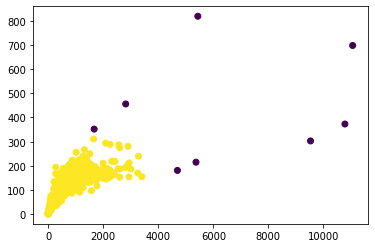

In [36]:
plt.scatter(page_views['count'], page_views['nunique'], c=page_views.labels)
plt.show()